## Programming for Data Analysis Final Project
### Lecturer: Brian McGinley
#### Submission Date: 16/12/2019

Structure

Instructions

Intro..Phenomenon.. assumptions.. algorithm.. packages used.. dataset.. analyses and descriptions.. conclusion..

"Poker is unquestionably thriving among men, but women remain underrepresented in poker rooms all around the world and at the Main Event.Last year, just 272 of the 7,221 entries were female (3.7 percent), a troubling stat for those who advocate women in poker. There wasn’t much improvement this year, with only 3.8 percent (301 of 7,874) of the field being women." (Sofen, 2018)

Tanguy (2019)
when you use numpy.random in multiprocess application - it can lead to misleading behaviors.

Willems(2019) Pandas - "it offers powerful, expressive and flexible data structures that make data manipulation and analysis easy [...]The DataFrame is one of these structures".

Seaborn is a higher level data visualization package than matlplotlib which is built on top of it and Waskom has described it as "If Matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.” (Singh, 2019)

Dataframe offers two dimensional labelled data structures with columns which can accept different data types.


Cohen (2019)
Which data to sample.
Which sampling distribution to follow and when?
Which sampling algorithm to use.
How many to sample?

#### Criteria and Workflow.
Count
Simple definition and short task description.
Routine measurements and agreement between measurements.
Sample appropriately & create the dataset.
Carefully choose solution
Use a simple visualizations to explain task.

Geeks for Geeks (2019) "Generating random numbers has always been an useful utility in day-day programming for games or various types of gambling etc. Hence knowledge and shorthands of it in any programming language is always a plus to have"

# 1 Introduction
 
The objective of this assignment is to simulate a dataset of a real world phenomenon that is of interest and then analyze the dataset using various python codes and python packages. 
The packages used in this dataset include numpy, scipy, matplotlib, seaborn and pandas. 
The simulation of the dataset will be completed using numpys random package and then pandas dataframe function to create the dataset on one output. The simulated dataset will be based on the phenomenon of the final of a league based poker tournament format where the participants gain entry by entering at least one of the leagues gameweeks.

The description of this phenomenon, assumptions related to it, and generation of this dataset in its entirety will be discussed first. The simulated dataset will then be output in this notebook.

Finally the dataset will be analyzed, manipulated, visualized, assessed and have conclusions drawn from it in its entirety and the relationships, if any, between the variables within it to justify the phenomenon.

In [1]:
#Importing the Python packages to be used in this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#allow inline interactive matplotlib plots
%matplotlib inline
import seaborn as sns

### Phenomenon

The phenomenon chosen is the generation of the final of a poker tournament based on several variables. The poker tournament used is based on a league format. The league consists of 150 participants/players. There are 30 gameweeks. The 150 participants are split into 90 percent men and 10 percent women and into randomly assigned poker playing levels of beginner, intermediate and advanced.


The participants ages will be generated in the range 18-75 considering the likelihood of ages of participants in a tournament.

The players gain points each week for playing, graded on the participants placement in each gameweek, i.e. 1 point for each of the 150 participants meaning last place gets 1 point, 75th gets 75 points and 1st get 150, etc.

These points are accumulated throughout the gameweeks and are related to the gameweeks played meaning those in the range of gameweeks played 0-10 will have less points than 10-20 and so on.


The final tournament chip count for playing is then calculated from these points accumulated to give final chip counts which the players will play with at the final off the tournament.

Each point gets 500 chips so these are generated from the points column by multiplying them plus a 1000 bonus chips for each participant in the final.

The final data point which will be simulated and added into the dataset to assume its relevance to a players chances in the final is previous hand win percentage. These will randomized in the range 30% - 65% because............

This dataset will use pre-tournament data points to try and figure out some of the following. 
Is there a relationship between gamweeks played and final chip counts?

Is there a relationship between level and chip count?

Is there a relationship between age and chip count in final?

Is there a relationship between sex and chip count in final?

Is there a relationship between the hands won percentage and chip count in final?

We will compile univariate analysis, bivariate analysis and multivariate analysis to see if there are more explanations inferred in the dataset..
The primary resources for data analysis of the Tips dataset in this assignment are utilizing python programming language through Anaconda, Visual Studio Code, Python.org tutorials and w3schools tutorials with packages such as pandas, seaborn, matplotlib and numpy utilized alongside various other compositions regarding the same.
The primary graphical types that will be used bar charts, line charts, box plots, scatter plots, violin plots and histograms.

Number of Inputs: 150
Number of Attributes/columns: chipcount, gameweeksplayed, level, win percentage, sex, age, count
Attribute Measurement:
* count = numeric - count of players in the final - 150 total
* chips = numeric - count of chips per player in the final - 500 per point + 1000 bonus
* gwp = numeric - amount of game weeks played in the tournament = 30 total
* totalpts = numeric - full count of points gathered throughout the league
* gender = classification of sex - Male/Female
* age = numeric - range of ages of players - range chosen - 18 - 75
* level = classification - 3 levels of player - beginner, intermediate, advanced
* handswon% = numeric percentage - percentage of hands played where player won - lowest 25% - highest 65%
* analysis Type: Multivariate

In [2]:
field = np.arange(1, 151)

In [3]:
#gameweeks attended
np.random.seed(1)
gwp10 = np.random.randint(1, 10, 50)
np.random.seed(1)
gwp20 = np.random.randint(11, 20, 50)
np.random.seed(1)
gwp30 = np.random.randint(21, 30, 50)
np.random.seed(1)
partweek = np.append(gwp10, gwp20)
totalgwp = np.append(partweek, gwp30)
totalgwp

array([ 6,  9,  6,  1,  1,  2,  8,  7,  3,  5,  6,  3,  5,  3,  5,  8,  8,
        2,  8,  1,  7,  8,  7,  2,  1,  2,  9,  9,  4,  9,  8,  4,  7,  6,
        2,  4,  5,  9,  2,  5,  1,  4,  3,  1,  5,  3,  8,  8,  9,  7, 16,
       19, 16, 11, 11, 12, 18, 17, 13, 15, 16, 13, 15, 13, 15, 18, 18, 12,
       18, 11, 17, 18, 17, 12, 11, 12, 19, 19, 14, 19, 18, 14, 17, 16, 12,
       14, 15, 19, 12, 15, 11, 14, 13, 11, 15, 13, 18, 18, 19, 17, 26, 29,
       26, 21, 21, 22, 28, 27, 23, 25, 26, 23, 25, 23, 25, 28, 28, 22, 28,
       21, 27, 28, 27, 22, 21, 22, 29, 29, 24, 29, 28, 24, 27, 26, 22, 24,
       25, 29, 22, 25, 21, 24, 23, 21, 25, 23, 28, 28, 29, 27])

In [4]:
#points generation
np.random.seed(1)
ptlow = np.random.randint(30, 150, 50)
np.random.seed(1)
ptmed = np.random.randint(151, 300, 50)
np.random.seed(1)
pthigh = np.random.randint(301, 600, 50)
np.random.seed(1)
ptpart = np.append(ptlow, ptmed)
totalpts = np.append(ptpart, pthigh)
totalpts

array([ 67, 137,  42, 102,  39, 105,  35, 109,  94,  46,  31, 106, 101,
       139,  36,  55,  80,  50, 131,  48, 114,  41, 136,  58,  59,  44,
        80,  98, 117, 117, 135, 143, 149, 124, 126, 116,  43, 135,  39,
        37,  93,  91,  52,  87,  31,  30,  90, 111,  38, 118, 188, 291,
       223, 288, 284, 230, 295, 280, 222, 285, 176, 171, 252, 297, 290,
       293, 201, 219, 247, 237, 292, 288, 158, 214, 212, 173, 208, 152,
       279, 211, 159, 292, 266, 272, 181, 222, 282, 200, 208, 154, 175,
       194, 227, 177, 203, 231, 260, 266, 192, 166, 338, 536, 373, 556,
       504, 434, 445, 430, 372, 538, 582, 479, 577, 555, 553, 457, 351,
       369, 516, 542, 387, 442, 308, 323, 302, 510, 565, 517, 442, 416,
       422, 331, 372, 350, 304, 581, 344, 377, 327, 410, 598, 316, 365,
       497, 326, 527, 583, 454, 405, 323])

In [5]:
#chips
np.random.seed(1)
chips = 500 * totalpts + 1000
chips

array([ 34500,  69500,  22000,  52000,  20500,  53500,  18500,  55500,
        48000,  24000,  16500,  54000,  51500,  70500,  19000,  28500,
        41000,  26000,  66500,  25000,  58000,  21500,  69000,  30000,
        30500,  23000,  41000,  50000,  59500,  59500,  68500,  72500,
        75500,  63000,  64000,  59000,  22500,  68500,  20500,  19500,
        47500,  46500,  27000,  44500,  16500,  16000,  46000,  56500,
        20000,  60000,  95000, 146500, 112500, 145000, 143000, 116000,
       148500, 141000, 112000, 143500,  89000,  86500, 127000, 149500,
       146000, 147500, 101500, 110500, 124500, 119500, 147000, 145000,
        80000, 108000, 107000,  87500, 105000,  77000, 140500, 106500,
        80500, 147000, 134000, 137000,  91500, 112000, 142000, 101000,
       105000,  78000,  88500,  98000, 114500,  89500, 102500, 116500,
       131000, 134000,  97000,  84000, 170000, 269000, 187500, 279000,
       253000, 218000, 223500, 216000, 187000, 270000, 292000, 240500,
      

In [6]:
# sex
np.random.seed(1)
male = ('male', 'male')
female = ('female', 'female')
# 10% women calculation
sex = (np.append(np.random.choice(male, 135), np.random.choice(female, 15)))
np.random.seed(1)
gender = np.random.permutation(sex)
gender

array(['male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'm

In [7]:
#age
np.random.seed(1)
age = np.random.randint(18, 75, 150)
age

array([55, 61, 30, 26, 27, 29, 23, 33, 18, 34, 19, 30, 25, 63, 24, 43, 68,
       38, 55, 36, 38, 29, 60, 46, 47, 32, 68, 22, 41, 41, 59, 67, 73, 48,
       50, 40, 31, 59, 27, 25, 40, 19, 18, 35, 26, 42, 31, 69, 65, 60, 26,
       48, 25, 21, 24, 39, 67, 21, 22, 42, 67, 61, 30, 44, 70, 34, 63, 69,
       59, 36, 33, 18, 22, 43, 65, 52, 41, 25, 44, 43, 58, 40, 27, 21, 57,
       41, 54, 45, 55, 37, 56, 26, 50, 52, 28, 41, 33, 65, 41, 43, 25, 69,
       46, 28, 64, 50, 42, 41, 73, 19, 67, 31, 21, 18, 74, 31, 24, 70, 39,
       24, 20, 30, 45, 39, 29, 25, 31, 26, 29, 30, 61, 38, 48, 54, 57, 25,
       63, 22, 66, 36, 50, 31, 28, 41, 35, 25, 42, 28, 46, 38])

In [8]:
#level
np.random.seed(1)
three_groups = ('beginner', 'intermediate', 'advanced')
level = np.random.choice(three_groups, 150)

In [58]:
##handswon
np.random.seed(1)
smallwin = np.random.randint(low= 25, high=55, size = 50)
midwin = np.random.randint(low= 35, high=60, size = 50)
highwin = np.random.randint(low = 45, high =65, size =50)
allwin = np.append(smallwin, midwin)
handswon = np.append(allwin, highwin)
handswon

array([30, 36, 37, 33, 34, 36, 30, 40, 25, 41, 26, 37, 32, 38, 53, 31, 50,
       43, 45, 30, 43, 45, 36, 53, 35, 53, 54, 39, 43, 29, 48, 48, 34, 42,
       48, 25, 47, 38, 34, 34, 32, 54, 47, 50, 26, 25, 53, 42, 33, 49, 48,
       54, 50, 45, 43, 42, 38, 41, 56, 52, 38, 39, 59, 52, 46, 47, 55, 51,
       48, 54, 44, 53, 50, 35, 39, 50, 37, 58, 42, 43, 57, 44, 38, 42, 58,
       39, 40, 54, 41, 43, 35, 37, 45, 58, 50, 50, 58, 42, 54, 45, 59, 45,
       46, 62, 58, 48, 45, 58, 51, 51, 47, 57, 56, 52, 58, 53, 56, 57, 56,
       49, 52, 52, 58, 49, 61, 63, 45, 58, 55, 62, 52, 55, 45, 57, 46, 54,
       63, 64, 46, 47, 57, 52, 47, 55, 45, 54, 63, 51, 47, 52])

In [59]:
dataset = pd.DataFrame({'count': field, 'chips': chips, 'gwp': totalgwp, 
                        'totalpts': totalpts, 'gender': gender,
                        'age':age, 'level': level, 'handswon%': handswon})
dataset.style.hide_index()

count,chips,gwp,totalpts,gender,age,level,handswon%
1,34500,6,67,male,55,intermediate,30
2,69500,9,137,male,61,beginner,36
3,22000,6,42,male,30,beginner,37
4,52000,1,102,male,26,intermediate,33
5,20500,1,39,male,27,intermediate,34
6,53500,2,105,male,29,beginner,36
7,18500,8,35,female,23,beginner,30
8,55500,7,109,male,33,intermediate,40
9,48000,3,94,male,18,beginner,25
10,24000,5,46,male,34,intermediate,41


There are two types of data: categorical and numerical data. Categorical data is non numerical data such as gender, race, religion, etc. while numerical data is any data that have a measurement or count in data type, e.g. height, weight, age, etc. Within the tips data set the attributes (verified by info() above) can be subdivided into:

Categorical data:
gender
level

Numerical data:
age
gwp
totalpts
chips
count
handswon%
The first useful descriptive statistic is the Measure of Center or the averages of the dataset. This comes in the form of calculating the median and mean of the dataset. To calculate this pandas has built in functions which we can use to describe the mean of the numeric data types, as seen below;

In [13]:
average = dataset['chips'].mean()
average

126396.66666666667

In [14]:
dataset.mean()

count            75.500000
chips        126396.666667
gwp              15.120000
totalpts        250.793333
age              41.086667
handswon%        42.673333
dtype: float64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
count        150 non-null int32
chips        150 non-null int32
gwp          150 non-null int32
totalpts     150 non-null int32
gender       150 non-null object
age          150 non-null int32
level        150 non-null object
handswon%    150 non-null int32
dtypes: int32(6), object(2)
memory usage: 5.9+ KB


In [16]:
dataset.std()

count           43.445368
chips        79657.031116
gwp              8.629526
totalpts       159.314062
age             15.703177
handswon%       11.063269
dtype: float64

In [17]:
dataset.describe()

,count,chips,gwp,totalpts,age,handswon%
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,126396.666667,15.120000,250.793333,41.086667,42.673333
std,43.445368,79657.031116,8.629526,159.314062,15.703177,11.063269
min,1.000000,16000.000000,1.000000,30.000000,18.000000,25.000000
25%,38.250000,59500.000000,8.000000,117.000000,28.000000,33.000000
50%,75.500000,112250.000000,15.000000,222.500000,39.500000,42.000000
75%,112.750000,176375.000000,22.750000,350.750000,54.000000,50.000000
max,150.000000,300000.000000,29.000000,598.000000,74.000000,65.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193D14A97F0>]],
      dtype=object)

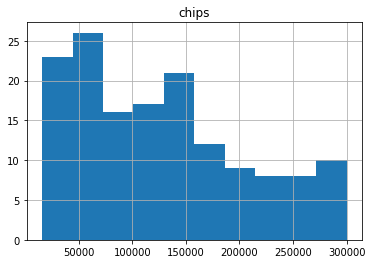

In [19]:
dataset.hist('chips')

AxesSubplot(0.125,0.125;0.775x0.755)


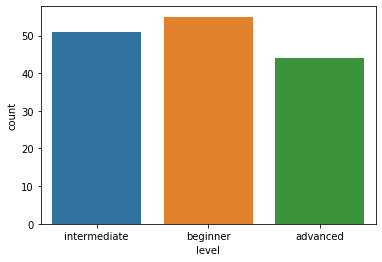

In [29]:
#using pie chart and bar chart
bar1 = sns.countplot(x='level', data=dataset)
print(bar1)

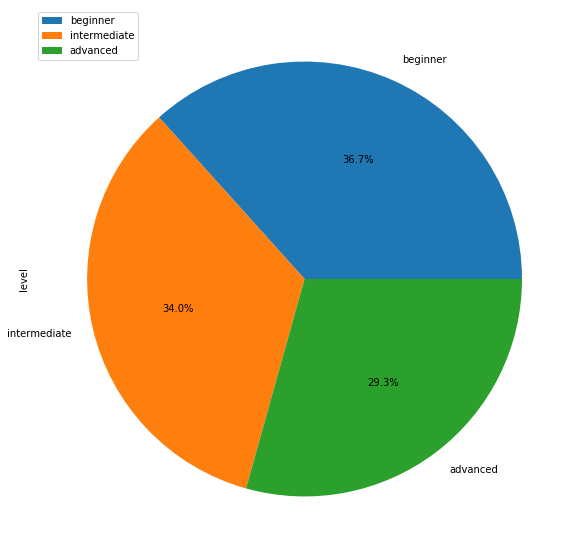

In [33]:
#using pie chart and bar chart to describe
type_counts = dataset['level'].value_counts()
dataset2 = pd.DataFrame({'level': type_counts})
dataset2.plot.pie(y='level', figsize=(10,10), autopct='%1.1f%%')

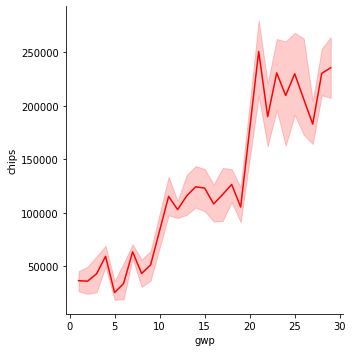

In [68]:
#using relplot and scatter type to plot the variables
sns.relplot(x="gwp", y="chips", data=dataset, kind = "line", color='r')

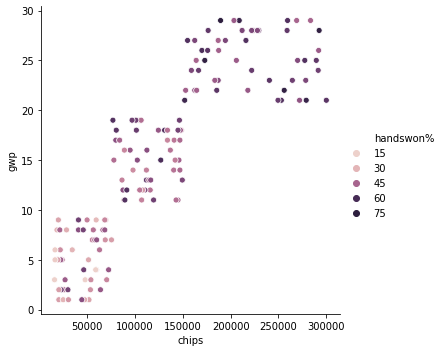

In [67]:
#using relplot and line type to plot the variables
sns.relplot(x="chips", y="gwp", hue = "handswon%", data=dataset, kind = "scatter")

 A common statistical action is to use linear regression to separate classification problems where the line acts as a divide between the different classes (Marsland, 2015)

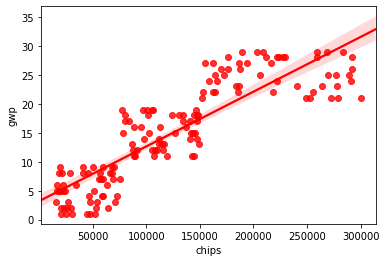

In [69]:
#using Seaborns regplot to show linear regression in dataset
sns.regplot(x="chips", y="gwp", data=dataset, color = "r")

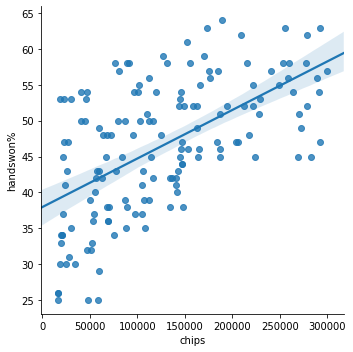

In [71]:
sns.lmplot(x="chips", y="handswon%", data=dataset)

Furthermore, as linear regression analysis hopes to predict trends the shaded areas either side of the lines are to portray the statistical mean along the line with a view of predicting generally the tip value at each point. This phenomenon known as the confidence interval reinforces the feeling that those on the extremes from the line and the shaded area are merely exceptions rather than the norm. There are further regressional analyses which can account for the spread of the dataset and the confidence interval. The following example deters the line off straight and it can be called using the parameter lowess as True, as below;

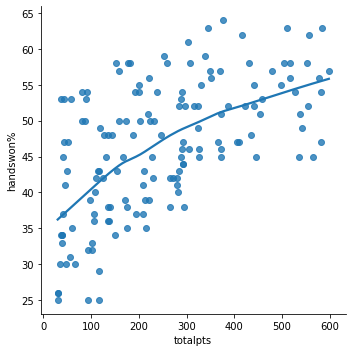

In [72]:
#using Seaborns lmplot including the lowess parameter in showing linear regression analysis.
sns.lmplot(x="totalpts", y="handswon%", data=dataset, lowess=True)

In [ ]:
#binomial example 55% tournament win rate)
import matplotlib.pyplot as plt
cash = np.zeros(10000)
cash[0] = 0
outcome = np.random.binomial(1, 1, size=len(cash))

for i in range(1, len(cash)):
    if outcome[i] < 1:
        cash[i] = cash[i - 1] - 1
    elif outcome[i] < 3:
        cash[i] = cash[i - 1] + 1
                
print(outcome.min(), outcome.max())

In [ ]:
straight = np.arange(len(cash))
plt.plot(straight, cash)
plt.show()

In [ ]:
n, p = 150, .55  # number of hands, probability of each hand
s = np.random.binomial(n, p)

sum(np.random.binomial(9, 0.65, 1000000) == 0)/1000000.